In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Final Transactions.csv')
df

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1754150,1754150,1754150,2023-07-02 23:56:36,161,655,531.43,15810996,182,0,0
1754151,1754151,1754151,2023-07-02 23:57:38,4342,6181,10.40,15811058,182,0,0
1754152,1754152,1754152,2023-07-02 23:58:21,618,1502,26.62,15811101,182,0,0
1754153,1754153,1754153,2023-07-02 23:59:52,4056,3067,550.43,15811192,182,0,0


## EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
df.describe()

,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,8.770770e+05,2.504011e+03,4.996733e+03,5.396820e+02,7.903234e+06,9.097260e+01,1.345200e-01,1.449746e-01
std,5.063811e+05,5.063811e+05,1.445987e+03,2.886101e+03,1.179711e+03,4.565172e+06,5.283709e+01,3.412103e-01,3.874872e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.385385e+05,4.385385e+05,1.252000e+03,2.502000e+03,1.799500e+02,3.940846e+06,4.500000e+01,0.000000e+00,0.000000e+00
50%,8.770770e+05,8.770770e+05,2.506000e+03,4.994000e+03,4.217500e+02,7.902670e+06,9.100000e+01,0.000000e+00,0.000000e+00
75%,1.315616e+06,1.315616e+06,3.765000e+03,7.495000e+03,7.505950e+02,1.186566e+07,1.370000e+02,0.000000e+00,0.000000e+00
max,1.754154e+06,1.754154e+06,4.999000e+03,9.999000e+03,6.478375e+05,1.581120e+07,1.820000e+02,1.000000e+00,3.000000e+00


In [5]:
print(f'The percentage of fraudulent transaction is {100 * df.TX_FRAUD.sum() / df.TX_FRAUD.count():2.1f} %')

The percentage of fraudulent transaction is 13.5 %


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


In [7]:
print(f"Total number of null data = {df.isnull().sum().max()}")

Total number of null data = 0


In [8]:
print(f"\
Total number of customer IDs =    {df['CUSTOMER_ID'].unique().sum():,}\n\
Total number of terminal IDs =    {df['TERMINAL_ID'].unique().sum():,}\n\
Total number of transaction IDs = {df['TRANSACTION_ID'].unique().sum():,}")

Total number of customer IDs =    12,471,947
Total number of terminal IDs =    49,995,000
Total number of transaction IDs = 1,538,529,004,935


In [9]:
print('Is TX_TIME_DAYS == TX_TIME_SECONDS')
(df['TX_TIME_DAYS'] - np.floor(df['TX_TIME_SECONDS']/3600/24)).sum()

Is TX_TIME_DAYS == TX_TIME_SECONDS


0.0

In [24]:
# plt.scatter(range(len(df)), df.TX_AMOUNT.sort_values()/1e6, 
#             marker='.', c='#fbb4ae', alpha=0.4);
# ax = plt.gca()
# ax.get_xaxis().set_visible(False)

# ax.set_ylabel('Transaction in millions of \$')
# ax.set_title('Checking the transactions scale');

In [25]:
# fig, ax = plt.subplots()
# plt.scatter(df['TX_AMOUNT'].loc[df['TX_FRAUD']==1], np.ones(len(df['TX_AMOUNT'].loc[df['TX_FRAUD']==1])), color='red')
# plt.scatter(df['TX_AMOUNT'].loc[df['TX_FRAUD']==0], np.zeros(len(df['TX_AMOUNT'].loc[df['TX_FRAUD']==0])), color='blue')
# ax.set_xscale('log')
# ax.yaxis.set_ticks([0,1])
# ax.yaxis.set_ticklabels(['Not fraud','Fraud'])
# ax.set_xlabel('Transaction value')
# ax.set_title('Correlation between transaction amount and being fraud');

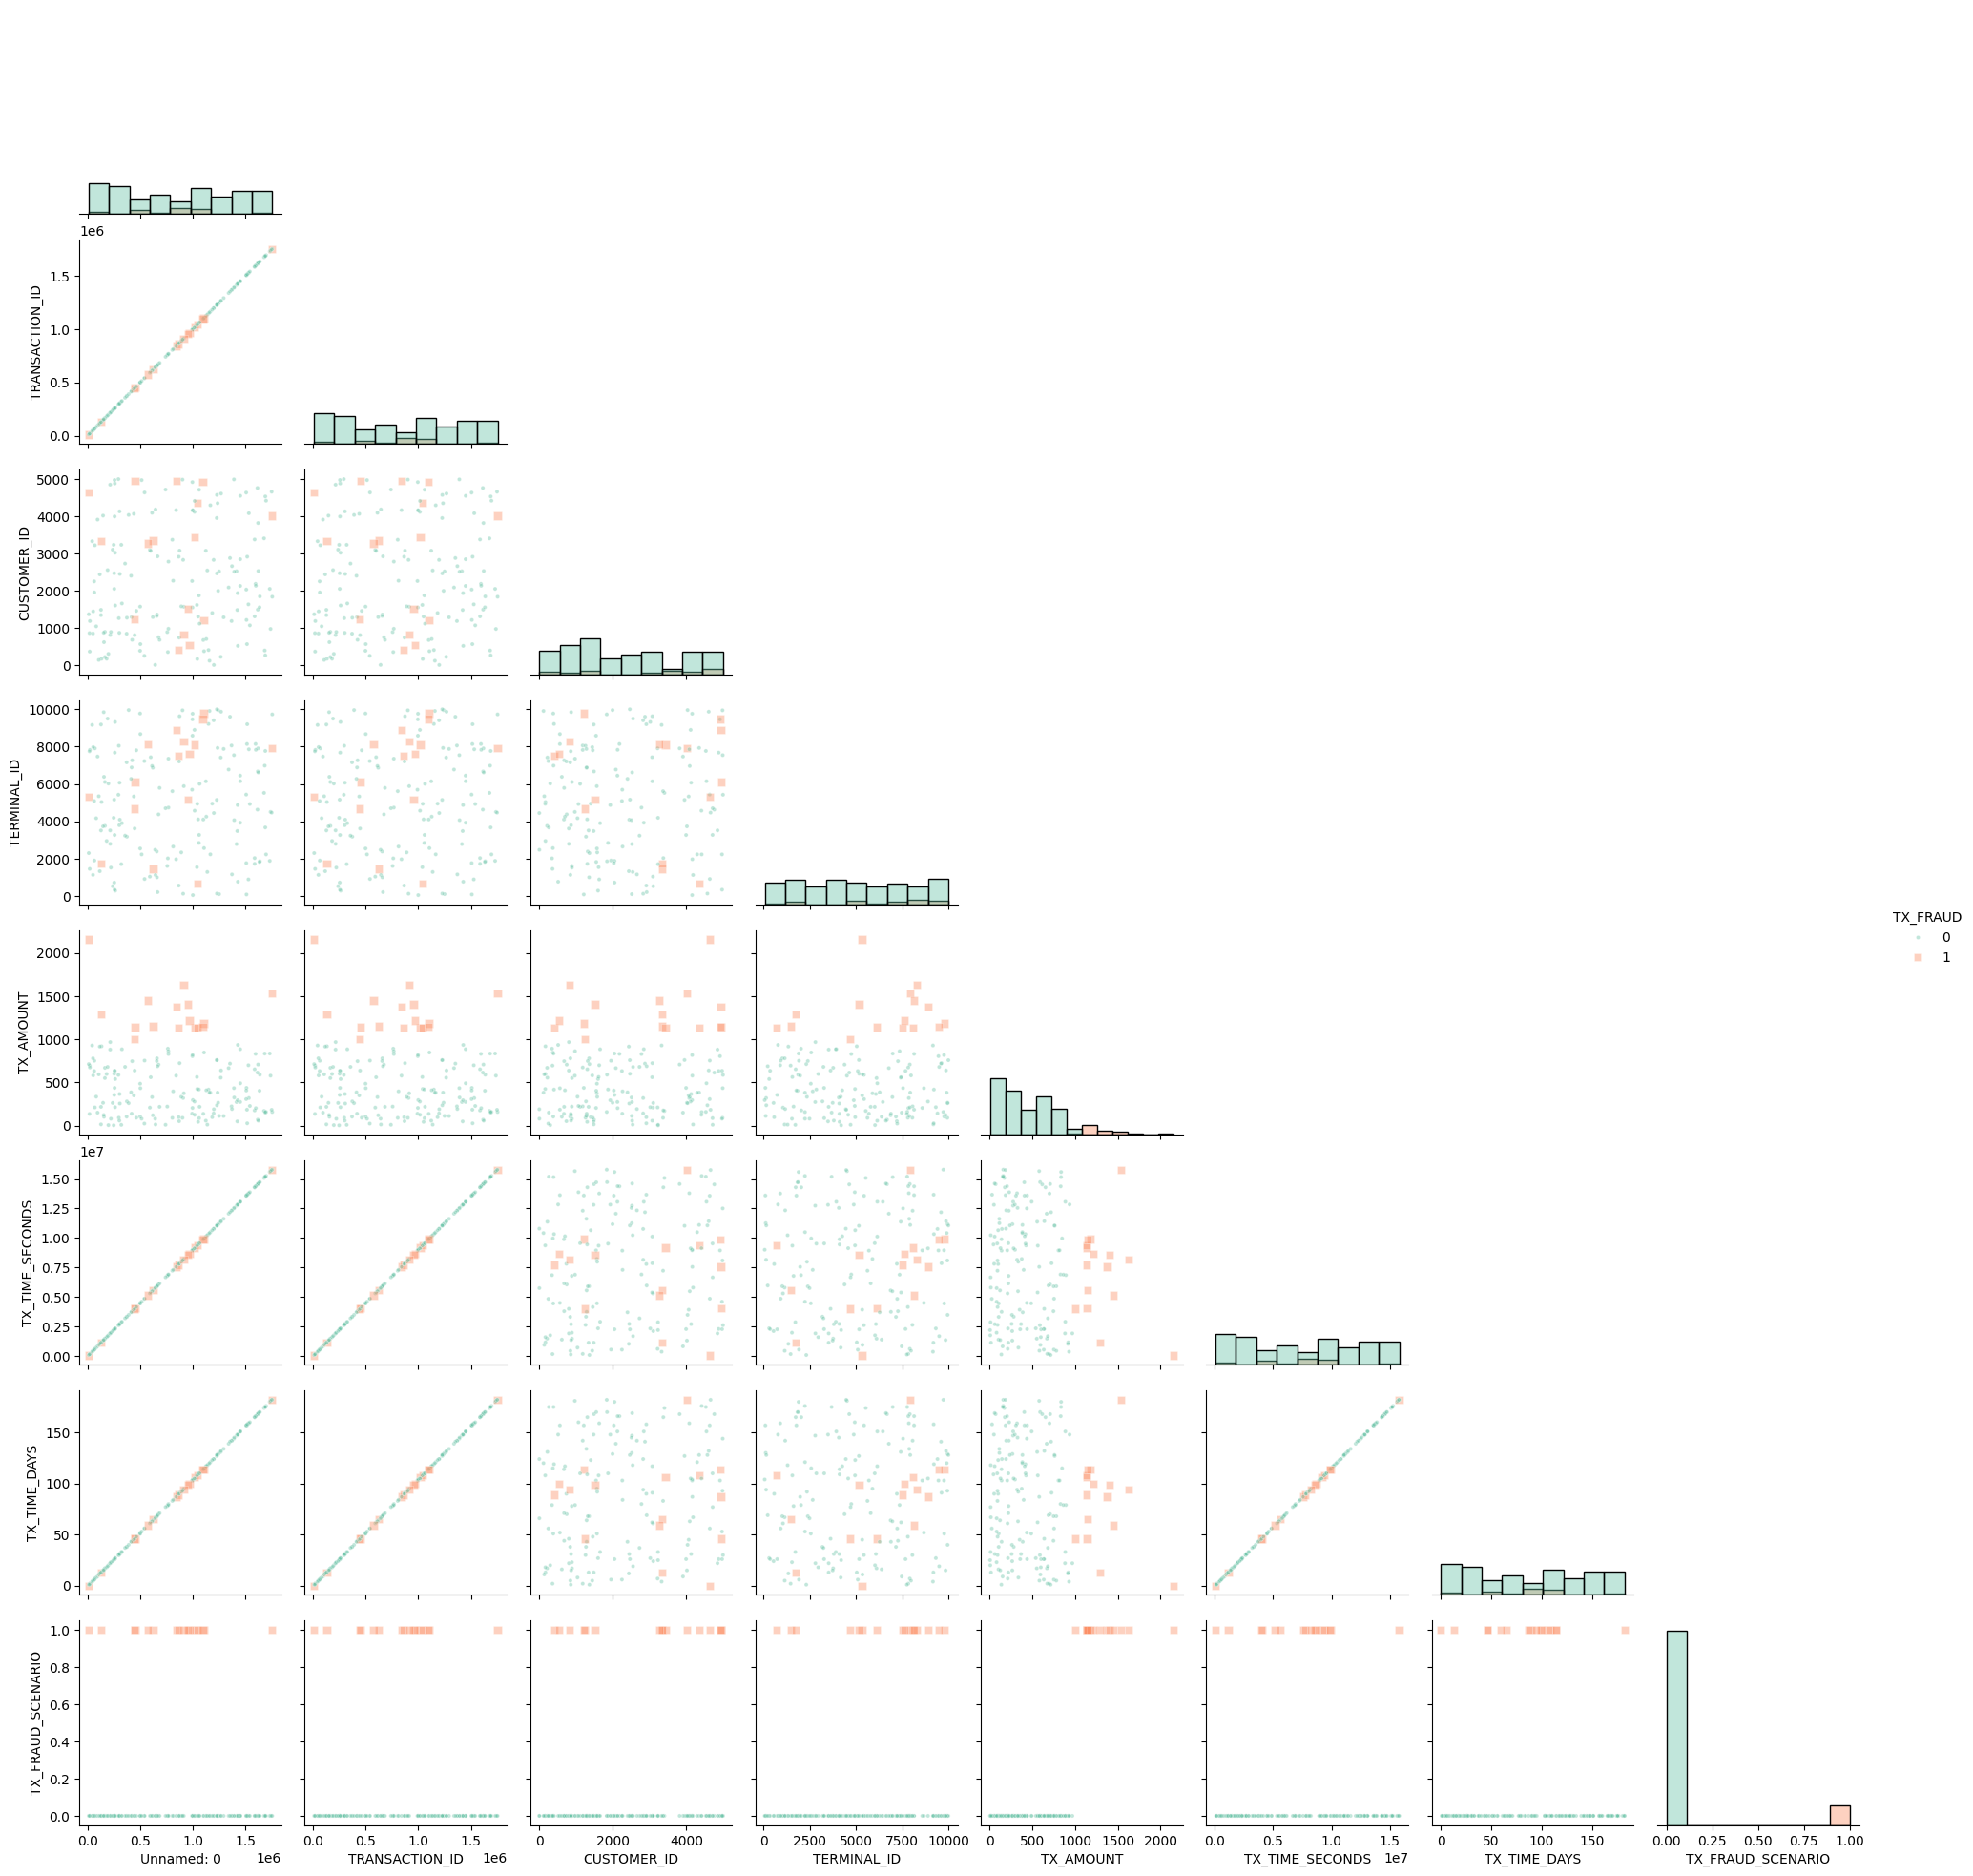

In [10]:
sns.pairplot(df.loc[df['TX_AMOUNT']<100_000].sample(frac=0.0001), hue="TX_FRAUD", 
             diag_kind="hist", palette=sns.color_palette("Set2",2),
             corner=True, markers=[".", "s"], height=2.5, plot_kws=dict(alpha=0.4),
             diag_kws=dict(alpha=0.4));

## Observations

- No missing data!
- #Customers < #Terminals < #Transactions
- `TX_TIME_DAYS` is the same info as  `TX_TIME_SECONDS`
- Imbalanced data: way less fraudulent transactions (13.5 %)
- More expensive transactions are more likely to be fraudulent

## Insights

- Drop `TX_TIME_DAYS`. No time series analysis is considered
    - Instead, use `OCCURENCE_ID` to determine the occurance order per customer.
    - Also, add `TIME_SINCE_LAST_TRANSACTION`
    - Leave `TX_TIME_SECONDS` in to capture information regarding frauds being more likely to happen in later times. Because hackers get used to the system.
- `OneHotEncoder`, `OrdinalEconder`, `LabelEncoder` are not appropriate for the categorical data because:
    * too many categories
    * lack of meaning to the actual values of IDs
- Instead of ID, use total number of terminals and transactions per customer and transactions per terminal
- `TX_DATETIME` may be converted into more useful features, such as `TX_MONTH`, `TX_DAY`, `TX_WEEKDAY`, `TX_HOUR`
    * Intuition: frauds may happen more often at specific months, days, weekdays, hour of the day.
- Remove transactions that are too expensive because after some point around 1000 \$ all transactions are fraudulent
- Balance data to learn identifying fraud better
    

In [11]:
# Convert `TX_DATETIME` into more useful features, such as `TX_MONTH`, `TX_DAY`, `TX_WEEKDAY`, `TX_HOUR`
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df['TX_DATETIME'].dt.year.unique() # only 2023 => no good info
df['TX_MONTH'] = df['TX_DATETIME'].dt.month
df['TX_DAY'] = df['TX_DATETIME'].dt.day
df['TX_WEEKDAY'] = df['TX_DATETIME'].dt.weekday
df['TX_HOUR'] = df['TX_DATETIME'].dt.hour
df.drop(['TX_DATETIME'], axis=1, inplace=True)

# Instead of ID, use total number of terminals and transactions per customer and transactions per terminal
df[['TRANSACTION_COUNT','TERMINAL_COUNT']] = df[['TRANSACTION_ID','TERMINAL_ID']].groupby(df['CUSTOMER_ID']).transform('nunique')
df['TRANSACTION_PER_TERMINAL_COUNT'] = df['TRANSACTION_COUNT'] / df['TERMINAL_COUNT']

# Add `OCCURENCE_ID` and `TIME_SINCE_LAST_TRANSACTION`
assert df.TX_TIME_SECONDS.is_monotonic_increasing
df['OCCURANCE_ID'] = df['TX_TIME_SECONDS'].groupby(df['CUSTOMER_ID']).cumcount()
df['TIME_SINCE_LAST_TRANSACTION'] = df['TX_TIME_SECONDS'].groupby(df['CUSTOMER_ID']).diff().fillna(0)

# Remove transactions that are too expensive because after some point around 1000 \$ all transactions are fraudulent
df.drop(df.loc[df['TX_AMOUNT']>10_000].index, axis=0, inplace=True)

# Drop useless features
df.drop(['Unnamed: 0','TX_TIME_DAYS', 'TX_FRAUD_SCENARIO','TRANSACTION_ID', 'CUSTOMER_ID', 'TERMINAL_ID'], axis=1, inplace=True)

# Consistency check and type optimization
df[['TX_FRAUD', 'TX_MONTH', 'TX_DAY', 'TX_WEEKDAY', 'TX_HOUR']]=df[['TX_FRAUD', 'TX_MONTH', 'TX_DAY', 'TX_WEEKDAY', 'TX_HOUR']].astype('uint8')
assert df.isnull().sum().sum()==0
display(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 1751808 entries, 0 to 1754154
Data columns (total 12 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   TX_AMOUNT                       float64
 1   TX_TIME_SECONDS                 int64  
 2   TX_FRAUD                        uint8  
 3   TX_MONTH                        uint8  
 4   TX_DAY                          uint8  
 5   TX_WEEKDAY                      uint8  
 6   TX_HOUR                         uint8  
 7   TRANSACTION_COUNT               int64  
 8   TERMINAL_COUNT                  int64  
 9   TRANSACTION_PER_TERMINAL_COUNT  float64
 10  OCCURANCE_ID                    int64  
 11  TIME_SINCE_LAST_TRANSACTION     float64
dtypes: float64(3), int64(4), uint8(5)
memory usage: 115.3 MB


None

,TX_AMOUNT,TX_TIME_SECONDS,TX_FRAUD,TX_MONTH,TX_DAY,TX_WEEKDAY,TX_HOUR,TRANSACTION_COUNT,TERMINAL_COUNT,TRANSACTION_PER_TERMINAL_COUNT,OCCURANCE_ID,TIME_SINCE_LAST_TRANSACTION
0,533.07,31,0,1,1,6,0,686,74,9.270270,0,0.0
1,808.56,130,0,1,1,6,0,738,88,8.386364,0,0.0
2,1442.94,476,1,1,1,6,0,338,70,4.828571,0,0.0
3,620.65,569,0,1,1,6,0,599,47,12.744681,0,0.0
4,490.66,634,0,1,1,6,0,494,82,6.024390,0,0.0


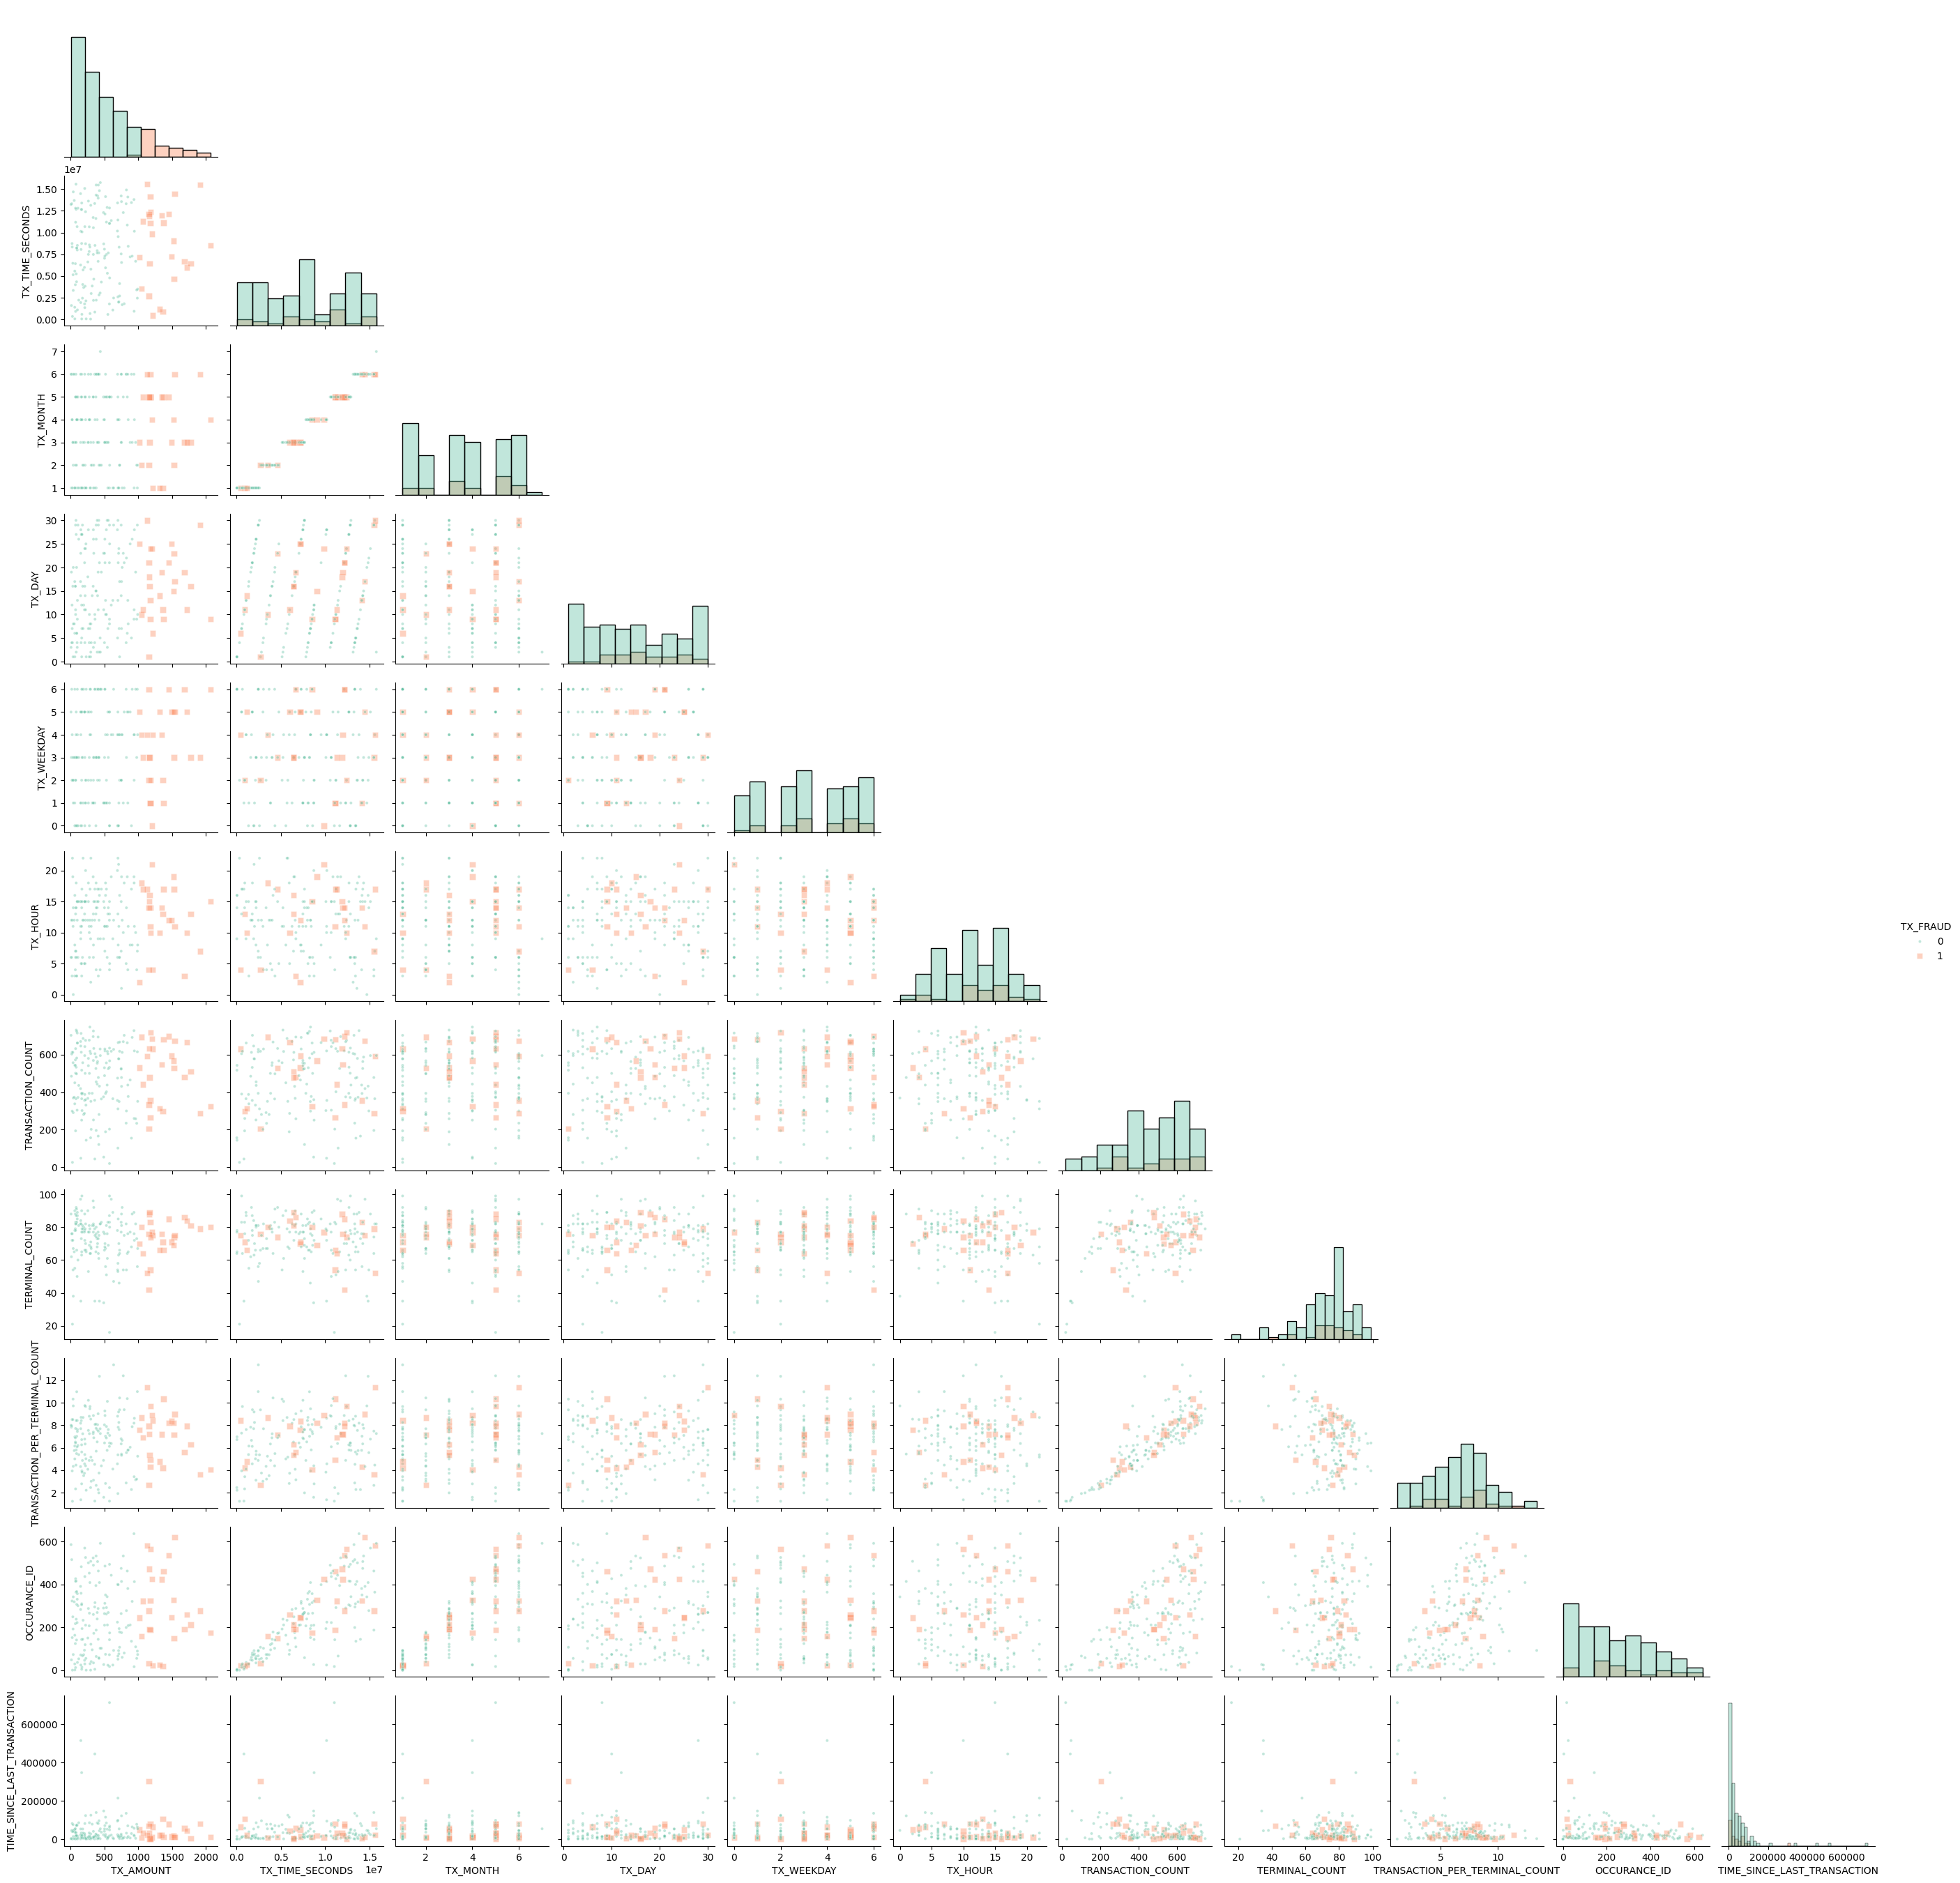

In [12]:
sns.pairplot(df.sample(frac=0.0001), hue="TX_FRAUD", 
             diag_kind="hist", palette=sns.color_palette("Set2",2),
             corner=True, markers=[".", "s"], height=2.5, plot_kws=dict(alpha=0.4),
             diag_kws=dict(alpha=0.4));

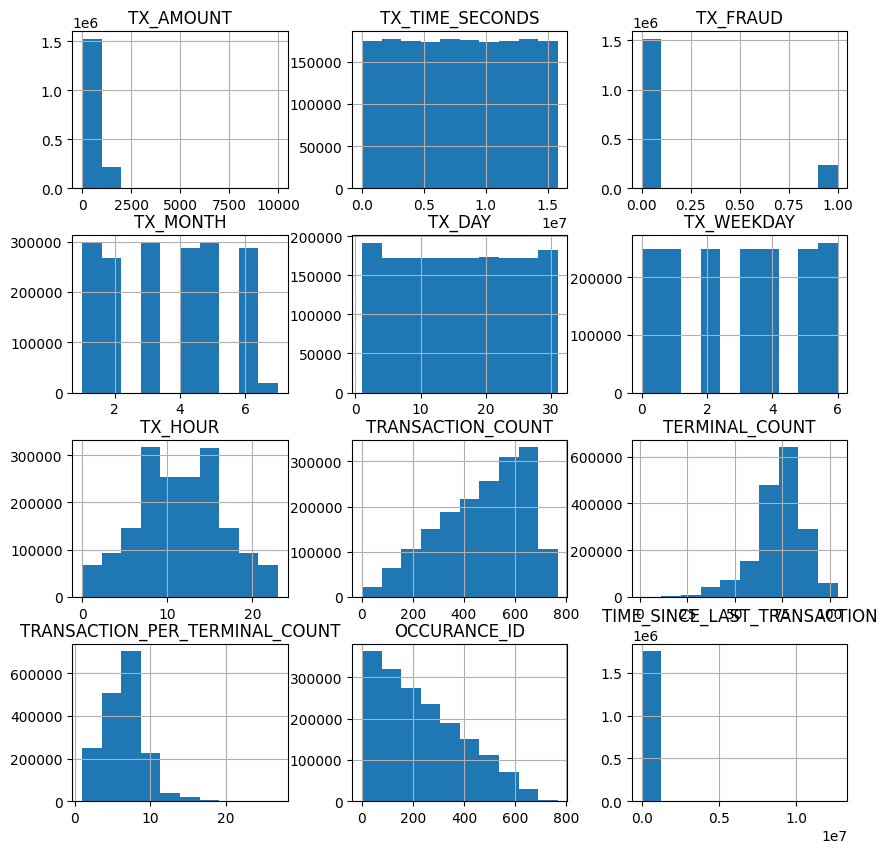

In [13]:
df.hist(figsize=(10,10));

# Data pre-processing

- Scale the data between 0 and 1;
- Undersample the training data to balance it;

,TX_AMOUNT,TX_TIME_SECONDS,TX_FRAUD,TX_MONTH,TX_DAY,TX_WEEKDAY,TX_HOUR,TRANSACTION_COUNT,TERMINAL_COUNT,TRANSACTION_PER_TERMINAL_COUNT,OCCURANCE_ID,TIME_SINCE_LAST_TRANSACTION
1392712,0.106342,0.794385,1.0,0.666667,0.833333,0.666667,0.347826,0.651436,0.815534,0.188994,0.513055,0.001156
1030214,0.132548,0.587236,1.0,0.500000,0.566667,0.166667,0.478261,0.694517,0.747573,0.225806,0.385117,0.005408
1025436,0.001101,0.583803,0.0,0.500000,0.533333,0.000000,0.869565,0.892950,0.737864,0.305656,0.531332,0.002714
1490592,0.115282,0.849859,1.0,0.833333,0.133333,0.000000,0.521739,0.956919,0.660194,0.373072,0.779373,0.000354
504646,0.003779,0.287073,0.0,0.166667,0.700000,0.333333,0.521739,0.772846,0.669903,0.289217,0.215405,0.000542


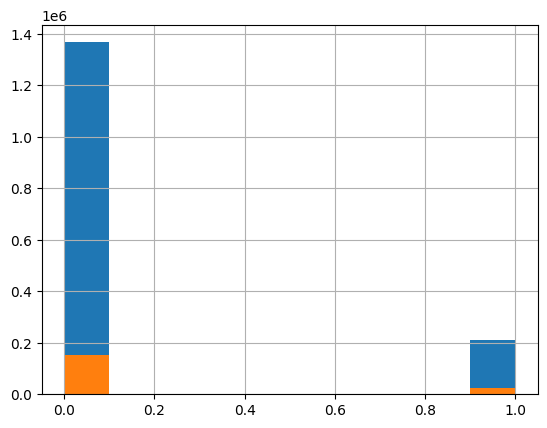

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[df_scaled.columns] = scaler.fit_transform(df)

df_train, df_test = train_test_split(df_scaled, test_size=0.1, stratify=df_scaled['TX_FRAUD'])

df_train['TX_FRAUD'].hist()
df_test['TX_FRAUD'].hist()

display(df_train.head())

## Imbalanced data

**Very important**: under sample only the *training* data. Doing it for the whole dataset is cheating. In practice, the model would be deployed to deal with unbalanced (reality) data in production.

,TX_AMOUNT,TX_TIME_SECONDS,TX_FRAUD,TX_MONTH,TX_DAY,TX_WEEKDAY,TX_HOUR,TRANSACTION_COUNT,TERMINAL_COUNT,TRANSACTION_PER_TERMINAL_COUNT,OCCURANCE_ID,TIME_SINCE_LAST_TRANSACTION
0,0.045060,0.244194,1.0,0.166667,0.433333,0.166667,0.695652,0.792428,0.699029,0.283694,0.187990,0.001580
1,0.096542,0.998053,0.0,1.000000,0.033333,1.000000,0.652174,0.198433,0.330097,0.130507,0.198433,0.013932
2,0.072302,0.800502,0.0,0.666667,0.866667,0.833333,0.478261,0.378590,0.747573,0.105707,0.295039,0.006395
3,0.109467,0.789095,1.0,0.666667,0.800000,0.500000,0.391304,0.706266,0.378641,0.485806,0.548303,0.005046
4,0.050607,0.772622,0.0,0.666667,0.700000,0.000000,0.391304,0.430809,0.631068,0.155425,0.340731,0.004851
...,...,...,...,...,...,...,...,...,...,...,...,...
84099,0.024068,0.597005,0.0,0.500000,0.633333,0.500000,0.260870,0.886423,0.689320,0.326882,0.561358,0.000484
84100,0.040997,0.101546,0.0,0.000000,0.600000,0.500000,0.565217,0.436031,0.631068,0.157771,0.054830,0.001916
84101,0.040861,0.577383,0.0,0.500000,0.500000,1.000000,0.652174,0.455614,0.436893,0.255820,0.276762,0.009834
84102,0.012675,0.358766,0.0,0.333333,0.200000,0.166667,0.652174,0.922977,0.796117,0.291489,0.362924,0.000768


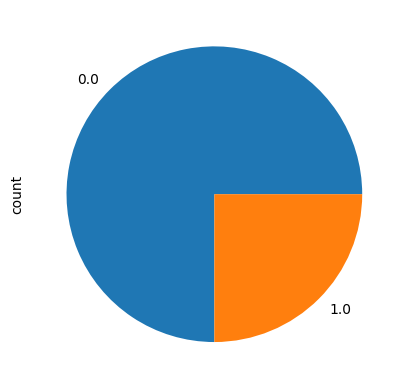

In [15]:
SHARE_OF_USEFUL_DATA_TRAIN = 0.1
FRAUD_RATIO = 3
n_fraud_train = int(SHARE_OF_USEFUL_DATA_TRAIN*df_train.loc[df_train['TX_FRAUD']==1].count().values[0])
df_train_balanced = pd.concat([df_train.loc[df_train['TX_FRAUD']==1].sample(n=n_fraud_train),
                               df_train.loc[df_train['TX_FRAUD']==0].sample(n=FRAUD_RATIO*n_fraud_train)],
                              axis=0, ignore_index=True)
df_train_balanced = df_train_balanced.sample(frac=1).reset_index(drop=True)
df_train_balanced['TX_FRAUD'].value_counts().plot.pie()
df_train_balanced

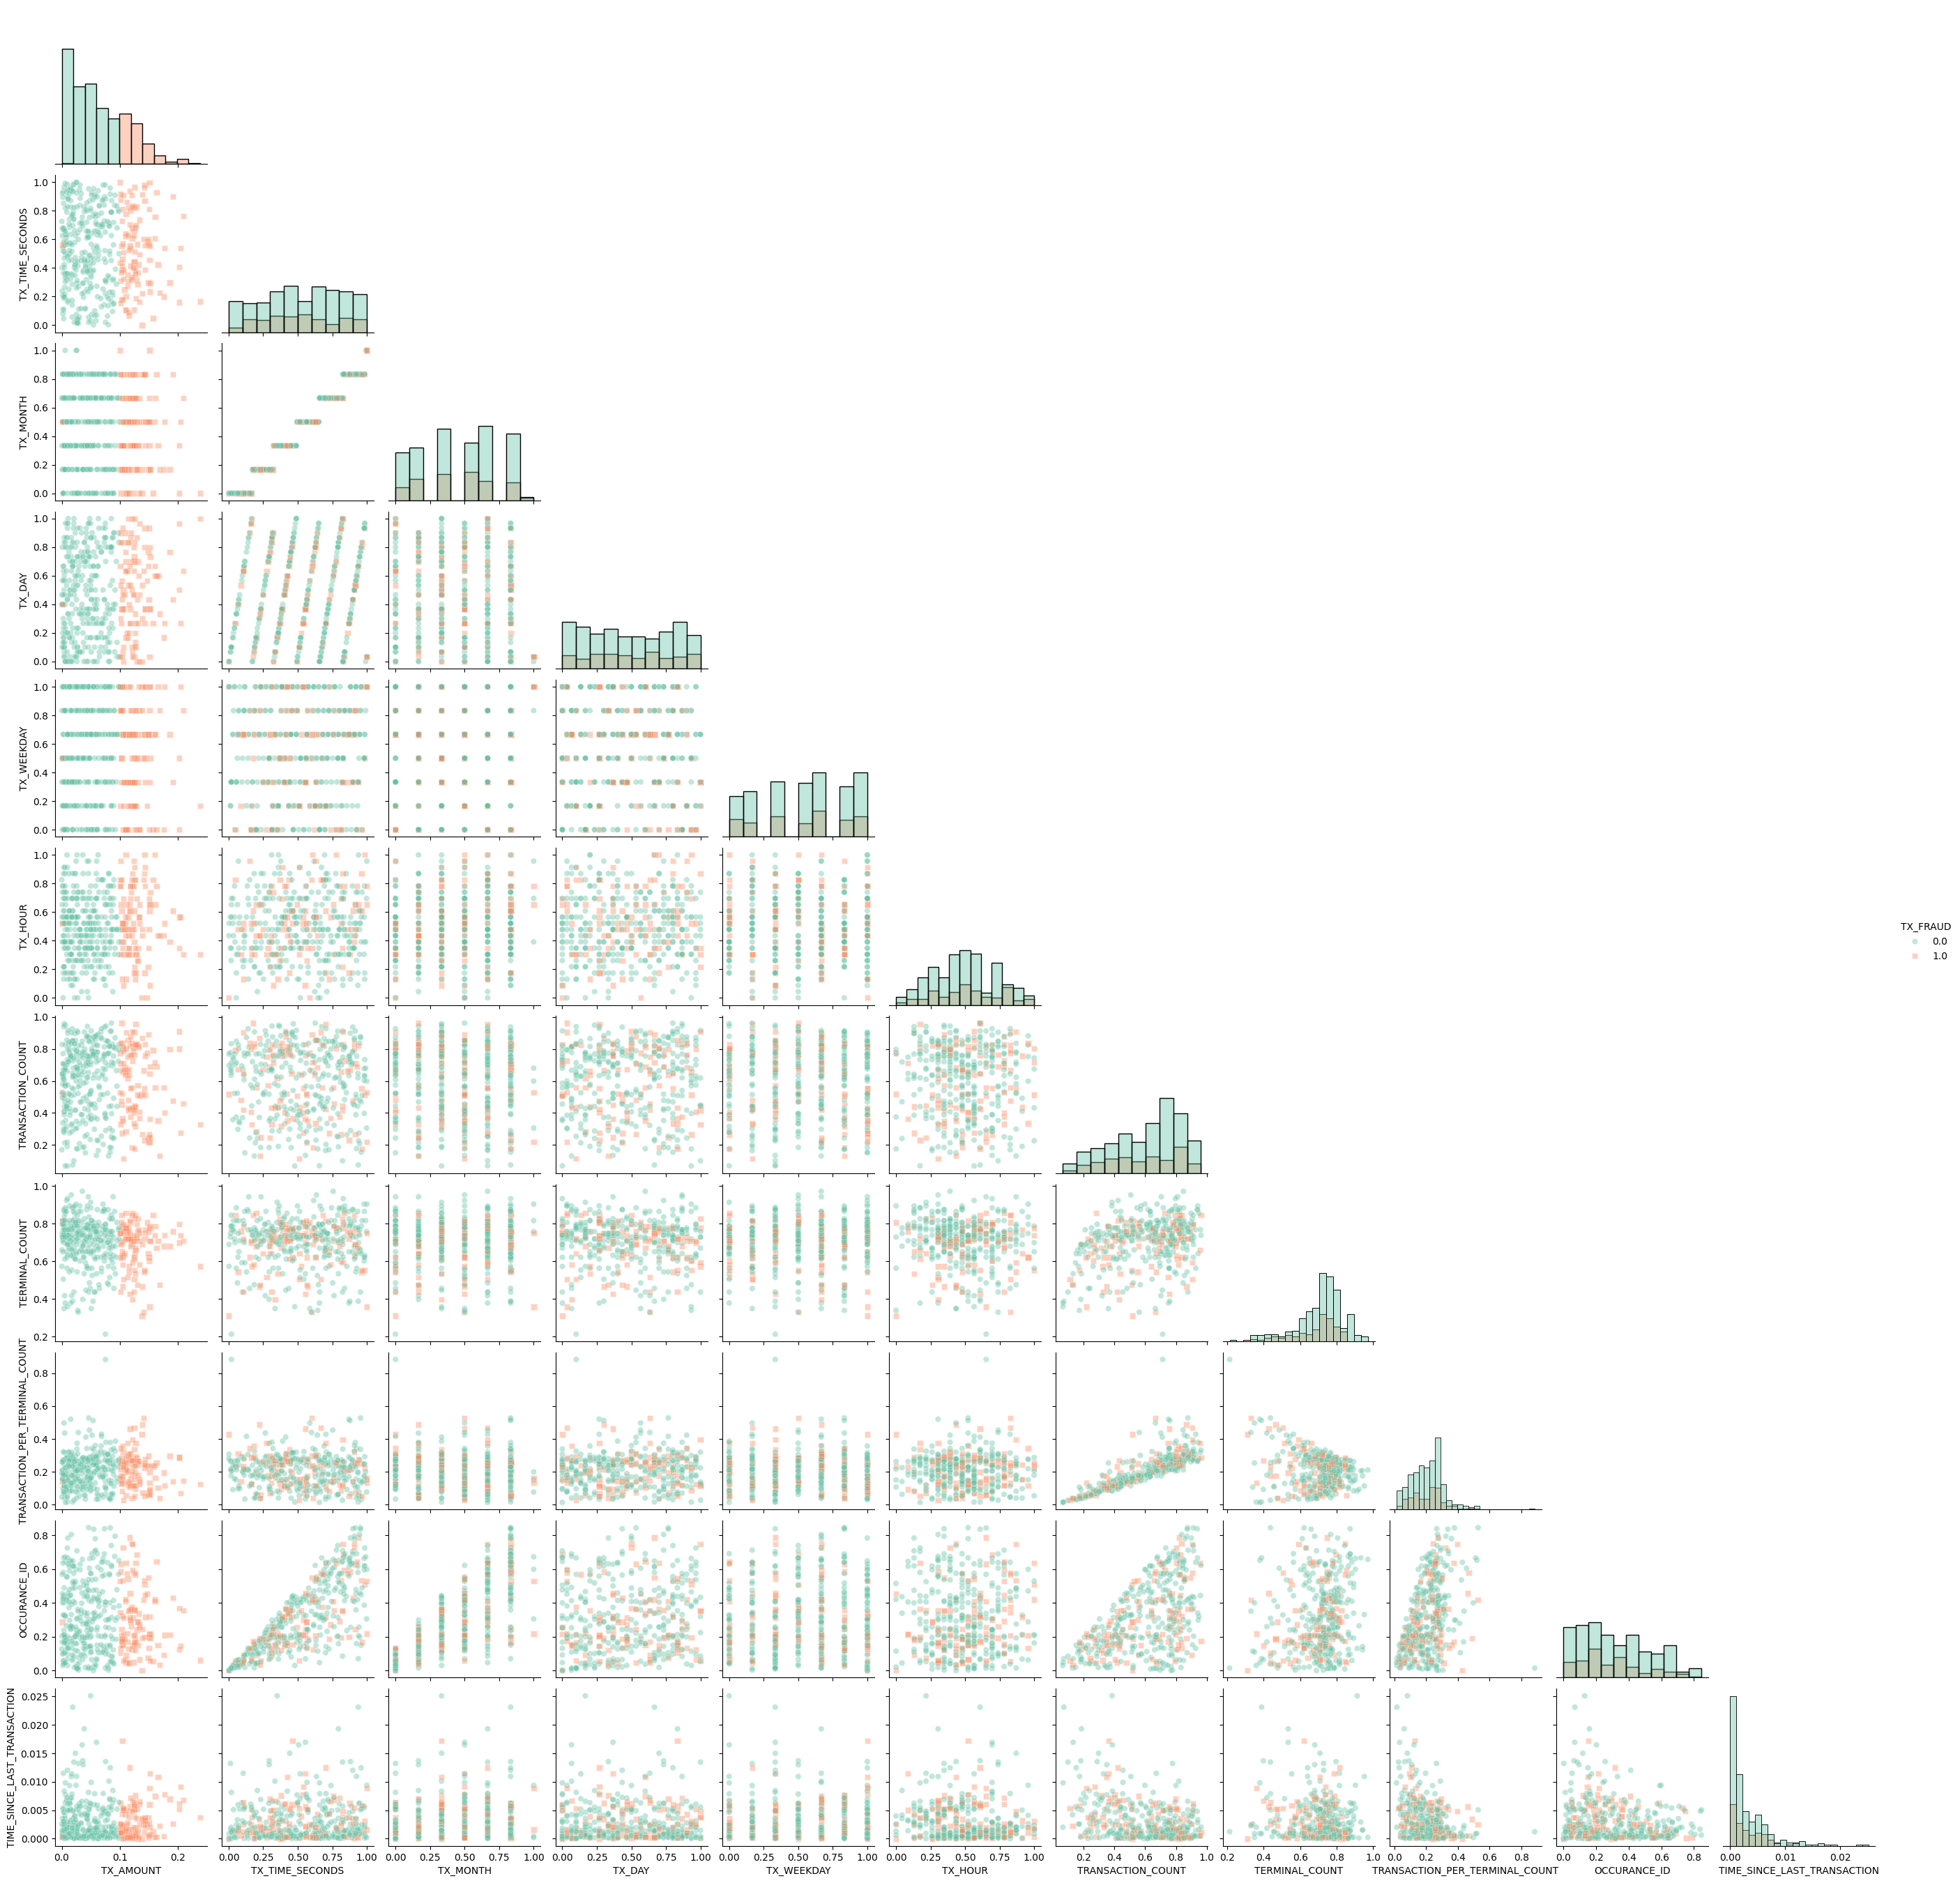

In [16]:
sns.pairplot(df_train_balanced.sample(frac=0.005), hue="TX_FRAUD", 
             diag_kind="hist", palette=sns.color_palette("Set2",2),
             corner=True, markers=["o", "s"], height=2.5, plot_kws=dict(alpha=0.4),
             diag_kws=dict(alpha=0.4));

In [17]:
X_train_balanced = df_train_balanced.drop(['TX_FRAUD'], axis=1)
y_train_balanced = df_train_balanced['TX_FRAUD']
X_train = df_train.drop(['TX_FRAUD'], axis=1)
y_train = df_train['TX_FRAUD']
X_test = df_test.drop(['TX_FRAUD'], axis=1)
y_test = df_test['TX_FRAUD']

X_train_balanced_tf = tf.constant(X_train_balanced)
y_train_balanced_tf = tf.expand_dims(tf.constant(y_train_balanced),axis=-1)
X_train_tf = tf.constant(X_train)
y_train_tf = tf.expand_dims(tf.constant(y_train),axis=-1);
X_test_tf = tf.constant(X_test)
y_test_tf = tf.expand_dims(tf.constant(y_test),axis=-1);

# Model training

- Train a DNN for classigication
- relu activation function
- binary cross entropy loss function
- early stop with validation loss

In [18]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
#     tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy', tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall()]
)

history = model.fit(
    X_train_balanced_tf, y_train_balanced_tf, epochs=200, verbose=1, validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=30,
                                               verbose=1, restore_best_weights=True)]
)

Epoch 1/200


2103/2103 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8991 - loss: 0.2629 - precision: 0.8855 - recall: 0.6472 - val_accuracy: 0.9773 - val_loss: 0.1105 - val_precision: 0.9447 - val_recall: 0.9653
Epoch 2/200
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9730 - loss: 0.1116 - precision: 0.9455 - recall: 0.9459 - val_accuracy: 0.9837 - val_loss: 0.0822 - val_precision: 0.9701 - val_recall: 0.9638
Epoch 3/200
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9767 - loss: 0.0865 - precision: 0.9595 - recall: 0.9462 - val_accuracy: 0.9817 - val_loss: 0.0697 - val_precision: 0.9611 - val_recall: 0.9653
Epoch 4/200
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9795 - loss: 0.0760 - precision: 0.9683 - recall: 0.9486 - val_accuracy: 0.9741 - val_loss: 0.0794 - val_precision: 0.9319 - val_recall: 0.9662
Epoch 5/200
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9801 - loss: 0.0741 - precision: 0.9712 - recall: 0.9481 - val_accuracy: 0.9724 - val_loss:

# Evaluate the model

In [19]:
model.evaluate(X_test_tf, y_test_tf)

5475/5475 ━━━━━━━━━━━━━━━━━━━━ 4s 730us/step - accuracy: 0.9863 - loss: 0.0457 - precision: 0.9318 - recall: 0.9668


[0.04708436504006386,
 0.9860315918922424,
 0.9320031404495239,
 0.9657135605812073]

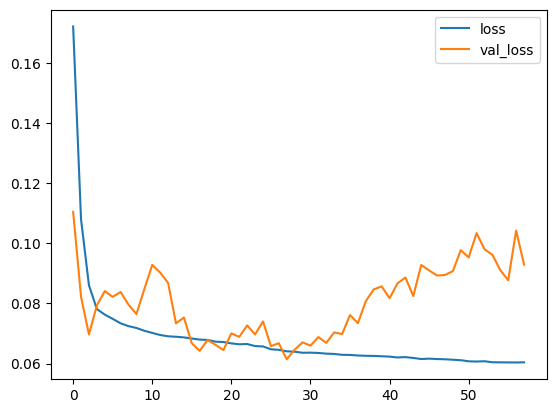

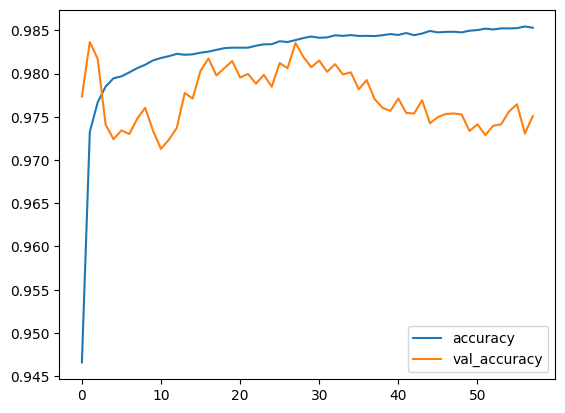

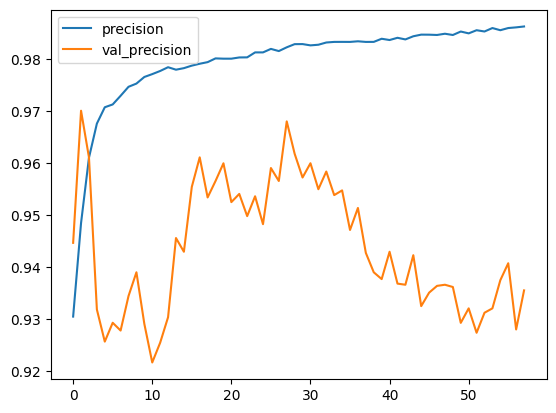

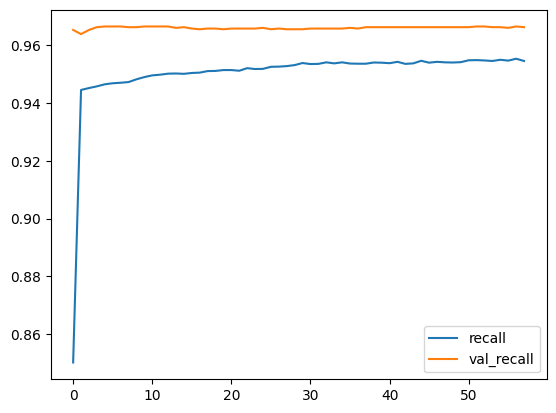

In [20]:
import re
df_history = pd.DataFrame(history.history)
df_history.columns = [re.split('_[0-9]', col)[0] for col in df_history.columns]
df_history[['loss', 'val_loss']].plot()
df_history[['accuracy', 'val_accuracy']].plot()
df_history[['precision', 'val_precision']].plot()
df_history[['recall', 'val_recall']].plot();

49270/49270 ━━━━━━━━━━━━━━━━━━━━ 40s 802us/step


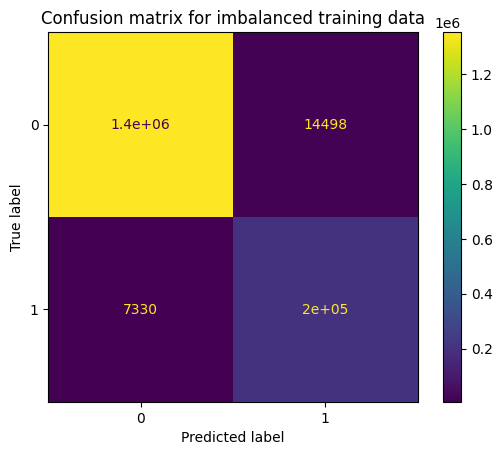

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_train = model.predict(tf.constant(X_train_tf))
y_pred_train = tf.round(y_pred_train)

cm = ConfusionMatrixDisplay(
    confusion_matrix(y_train, y_pred_train)
)
cm.plot();
ax = plt.gca()
ax.set_title('Confusion matrix for imbalanced training data');

2629/2629 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step


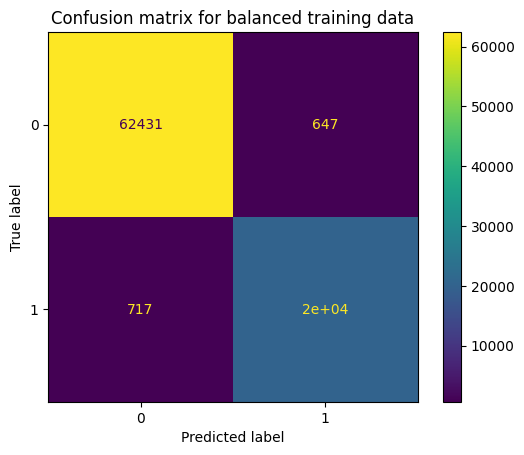

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_train_balanced = model.predict(tf.constant(X_train_balanced_tf))
y_pred_train_balanced = tf.round(y_pred_train_balanced)

cm = ConfusionMatrixDisplay(
    confusion_matrix(y_train_balanced, y_pred_train_balanced)
)
cm.plot();
ax = plt.gca()
ax.set_title('Confusion matrix for balanced training data');

5475/5475 ━━━━━━━━━━━━━━━━━━━━ 4s 804us/step


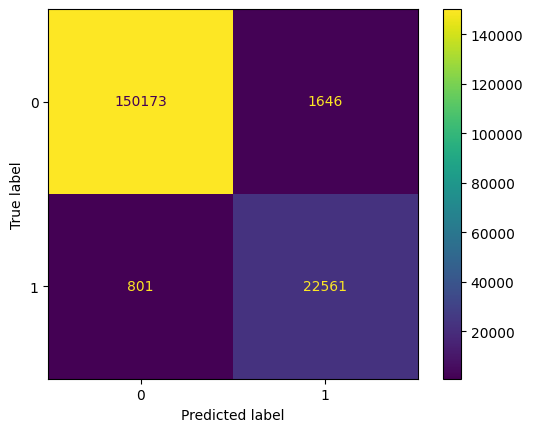

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(tf.constant(X_test_tf))
y_pred = tf.round(y_pred)

cm = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred)
)
cm.plot();
ax.set_title('Confusion matrix for imbalanced test data');

In [26]:
model.save('fraud_detection_model.h5')

In [27]:
model.save('fraud_detection.keras')